# Lead Scoring Case Study

- Understand the valrous columns
- Missing value imputation
- check data imbalance
- Outlier treatment
- Dummy variable creation 
- Test train split
- Standardisation
- Build model
- Feature elimination
- Model evaluation

- Attach a lead score for each row
- Find a cut off for hot-lead

## Functions

In [9]:
import pandas as pd

import matplotlib.pyplot as plt

In [10]:
def getNullColumns(df):
    print(df[df.columns[df.isnull().any()]].isnull().sum())

for col in df[df.columns[df.isnull().any()]].isnull()

In [11]:
##getNullColumns(df)

## Read data set

In [12]:
df = pd.read_csv("Leads.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [13]:
# TODO: Grooup, Reorder, Rename columns
COLS_ID = ['Prospect ID']
COLS_LOC = ['Country','City']
COLS_PROF = ['Specialization', 'What is your current occupation', 'Specialization', 'What matters most to you in choosing a course']
COLS_AD = ['How did you hear about X Education', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']
COLS_PREF = ['Do Not Email', 'Do Not Call','Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content',
                 'A free copy of Mastering The Interview','I agree to pay the amount through cheque']

COS_ACTIVTIY = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website','Last Activity', 'Last Notable Activity']

COLS_LEAD = ['Lead Number', 'Lead Origin', 'Lead Source','Lead Quality',  'Lead Profile', 'Tags']
COLS_ASYM = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

COLS_TARGET = ['Converted']

In [14]:
def colDetails(cols, label):
    print(f"\n{label}: {len(cols)} {cols}")

def colInfo(df, columns):
    for col in columns:
        if df[col].dtype == object:
            if df[col].isnull().sum() > 0:
                values = df[col].unique().tolist()
            else:
                values = sorted(df[col].unique().tolist())
            print(f"{col}: {len(values)} : {values}")
        else:
            #print(f"{col}: {df[col].describe()}")
            # TODO: mean, min, 25, 50, 75, max
            print(f"{col}: {df[col].mean():.0f} {df[col].quantile([0, .25, .50, .75, 1 ]).values.tolist()} ")

    df[columns][:5]

In [15]:
COLUMNS = df.columns.tolist(); colDetails(COLUMNS, "COLUMNS")

COLUMNS_CAT = df.select_dtypes(include=['object']).columns; 
COLUMNS_CAT = list(set(COLUMNS_CAT) - set(['Prospect ID']))
colDetails(COLUMNS_CAT, "COLUMNS_CAT")

COLUMNS_NULL = df[df.columns[df.isnull().any()]].columns.tolist(); colDetails(COLUMNS_NULL, "COLUMNS_NULL")


COLUMNS: 37 ['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']

COLUMNS_CAT: 29 ['City', 'X Education Forums', 'What is your current occupation', 'What matters most to you in choosing a co

### IDs
Identifiers of customer and lead
- Drop them for the model building

In [16]:
df[COLS_ID ][:5]

,Prospect ID
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620
1,2a272436-5132-4136-86fa-dcc88c88f482
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc
4,3256f628-e534-4826-9d63-4a8b88782852


In [17]:
print(df['Prospect ID'].unique().shape[0], df['Lead Number'].unique().shape[0])

9240 9240


### LOC

In [18]:
df[COLS_LOC]

,Country,City
0,NaN,Select
1,India,Select
2,India,Mumbai
3,India,Mumbai
4,India,Mumbai
...,...,...
9235,Saudi Arabia,Mumbai
9236,India,Mumbai
9237,India,Mumbai
9238,India,Other Metro Cities


### PROF

In [19]:
colInfo(df, COLS_AD)

How did you hear about X Education: 11 : ['Select', 'Word Of Mouth', 'Other', nan, 'Online Search', 'Multiple Sources', 'Advertisements', 'Student of SomeSchool', 'Email', 'Social Media', 'SMS']
Search: 2 : ['No', 'Yes']
Magazine: 1 : ['No']
Newspaper Article: 2 : ['No', 'Yes']
X Education Forums: 2 : ['No', 'Yes']
Newspaper: 2 : ['No', 'Yes']
Digital Advertisement: 2 : ['No', 'Yes']
Through Recommendations: 2 : ['No', 'Yes']


In [20]:
df[COLS_PROF]

,Specialization,What is your current occupation,Specialization,What matters most to you in choosing a course
0,Select,Unemployed,Select,Better Career Prospects
1,Select,Unemployed,Select,Better Career Prospects
2,Business Administration,Student,Business Administration,Better Career Prospects
3,Media and Advertising,Unemployed,Media and Advertising,Better Career Prospects
4,Select,Unemployed,Select,Better Career Prospects
...,...,...,...,...
9235,IT Projects Management,Unemployed,IT Projects Management,Better Career Prospects
9236,Media and Advertising,Unemployed,Media and Advertising,Better Career Prospects
9237,Business Administration,Unemployed,Business Administration,Better Career Prospects
9238,Human Resource Management,NaN,Human Resource Management,NaN


### AD

In [21]:
colInfo(df, COLS_AD)

How did you hear about X Education: 11 : ['Select', 'Word Of Mouth', 'Other', nan, 'Online Search', 'Multiple Sources', 'Advertisements', 'Student of SomeSchool', 'Email', 'Social Media', 'SMS']
Search: 2 : ['No', 'Yes']
Magazine: 1 : ['No']
Newspaper Article: 2 : ['No', 'Yes']
X Education Forums: 2 : ['No', 'Yes']
Newspaper: 2 : ['No', 'Yes']
Digital Advertisement: 2 : ['No', 'Yes']
Through Recommendations: 2 : ['No', 'Yes']


### COLUMNS_PREF
Preferences of the lead

In [22]:
colInfo(df, COLS_PREF)

Do Not Email: 2 : ['No', 'Yes']
Do Not Call: 2 : ['No', 'Yes']
Receive More Updates About Our Courses: 1 : ['No']
Update me on Supply Chain Content: 1 : ['No']
Get updates on DM Content: 1 : ['No']
A free copy of Mastering The Interview: 2 : ['No', 'Yes']
I agree to pay the amount through cheque: 1 : ['No']


In [23]:
print("Do Not Email = No\n", df[df['Do Not Email']=='No']['Converted'].value_counts())
print("Do Not Email = Yes\n", df[df['Do Not Email']=='Yes']['Converted'].value_counts())

Do Not Email = No
 0    5063
1    3443
Name: Converted, dtype: int64
Do Not Email = Yes
 0    616
1    118
Name: Converted, dtype: int64


In [24]:
print("Do Not Call = No\n", df[df['Do Not Call']=='No']['Converted'].value_counts())
print("Do Not Call = Yes\n", df[df['Do Not Call']=='Yes']['Converted'].value_counts())

Do Not Call = No
 0    5679
1    3559
Name: Converted, dtype: int64
Do Not Call = Yes
 1    2
Name: Converted, dtype: int64


In [25]:
df[df['Do Not Email']=='Yes']['Converted']

14      0
41      0
72      0
127     0
128     0
       ..
9216    0
9218    0
9225    0
9235    1
9237    0
Name: Converted, Length: 734, dtype: int64

### OTHERS

### ACTIVITY
Activity of the lead - Indicator of candidate's interest.
- Visits, Time spent: Higher the value, higher is the interest
- Last Activity & Last Notable Activity share the same values except 'Converted to Lead' of Last Activity
- Visits to the site and time spent on the website

In [26]:
colInfo(df, COS_ACTIVTIY)

TotalVisits: 3 [0.0, 1.0, 3.0, 5.0, 251.0] 
Page Views Per Visit: 2 [0.0, 1.0, 2.0, 3.0, 55.0] 
Total Time Spent on Website: 488 [0.0, 12.0, 248.0, 936.0, 2272.0] 
Last Activity: 18 : ['Page Visited on Website', 'Email Opened', 'Unreachable', 'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced', 'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed', 'Had a Phone Conversation', 'View in browser link Clicked', nan, 'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow', 'Resubscribed to emails', 'Email Received', 'Email Marked Spam']
Last Notable Activity: 16 : ['Approached upfront', 'Email Bounced', 'Email Link Clicked', 'Email Marked Spam', 'Email Opened', 'Email Received', 'Form Submitted on Website', 'Had a Phone Conversation', 'Modified', 'Olark Chat Conversation', 'Page Visited on Website', 'Resubscribed to emails', 'SMS Sent', 'Unreachable', 'Unsubscribed', 'View in browser link Clicked']


Text(0.5, 1.0, 'Converted==0')

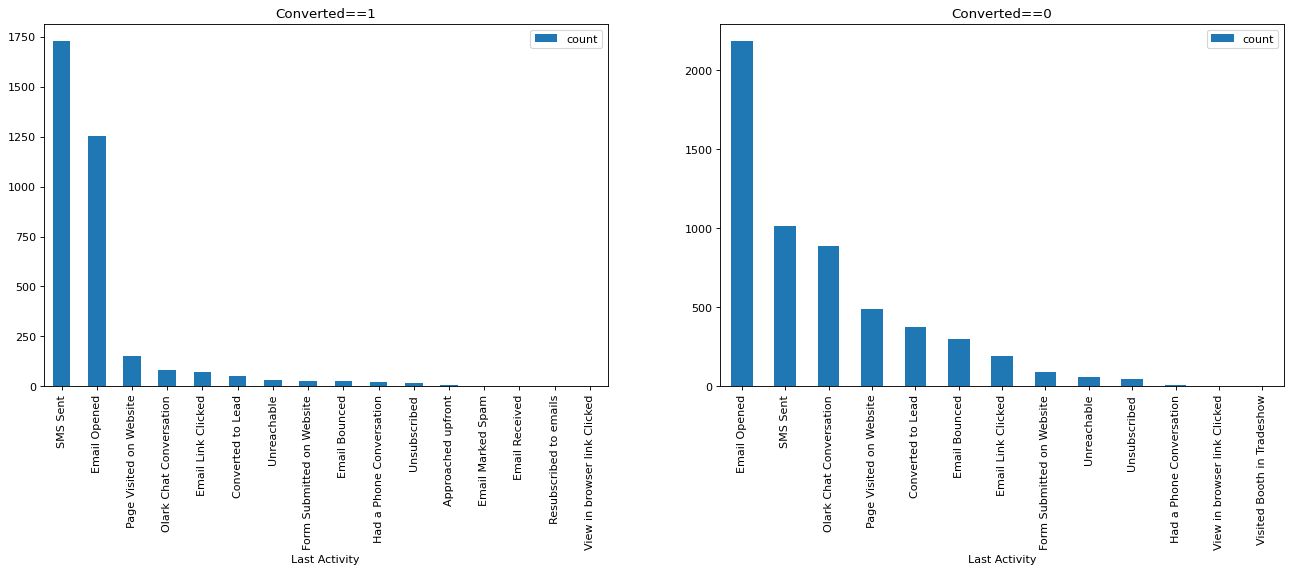

In [44]:
plt.figure(figsize=(20, 6), dpi=80)
ax = plt.subplot(1, 2, 1); 
df[df['Converted']==1].groupby('Last Activity').agg({'Last Activity':'count'}). \
        rename(columns={'Last Activity':'count'}).sort_values(by='count', ascending=False).plot.bar(ax=ax)#, ax=ax)
ax.set_title(f"Converted==1")

ax = plt.subplot(1, 2, 2); 
df[df['Converted']==0].groupby('Last Activity').agg({'Last Activity':'count'}). \
        rename(columns={'Last Activity':'count'}).sort_values(by='count', ascending=False).plot.bar(ax=ax)#, ax=ax)
ax.set_title(f"Converted==0")

In [ ]:
plt.figure(figsize=(20, 4), dpi=80)
ax = plt.subplot(2, 3, 1); df.boxplot(column='TotalVisits', by='Converted', ax=ax)
ax = plt.subplot(2, 3, 2); df.boxplot(column='Page Views Per Visit', by='Converted', ax=ax)
ax = plt.subplot(2, 3, 3); df.boxplot(column='Total Time Spent on Website', by='Converted', ax=ax)

#ax = plt.subplot(2, 3, 4); df.plot.bar(x='Last Activity', by='Converted', ax=ax)
#ax = plt.subplot(2, 3, 5); df.plot.bar(x='Last Notable Activity', by='Converted', ax=ax)
#ax = plt.subplot(2, 3, 6); df.plot.bar(column='Total Time Spent on Website', by='Converted', ax=ax)

### Asymmetric Index and Score

In [ ]:
colInfo(df, COLS_ASYM)

### LEAD
Lead related data - Where was the customer identified as a lead? Source, quality and level/profile of the lead


In [ ]:
colInfo(df, COLS_LEAD)

In [ ]:
df[df['Converted']==1][COLS_LEAD + ['Lead Number']]

### How are customers who are converted to paid customers?
What are the characteristics of the customers who are converted and not converted?

In [ ]:
TOTAL = df.shape[0]
print(TOTAL)

for value in df['Converted'].value_counts().index:
    count = df['Converted'].value_counts()[value]
    print(f"{value:2}: {count} : {100 * count/TOTAL:6.2f}% ", end='')
    print()


In [ ]:
df[df['Converted']==1][COLS_ASYM]

In [ ]:
df[COLUMNS_ASYM].plot.box(by='Converted', figsize = (10, 6));plt.show()

In [ ]:
plt.figure(figsize=(20, 6), dpi=80)

ax = plt.subplot(1, 2, 1); df.boxplot(column='Asymmetrique Activity Score', by='Converted', ax=ax)
ax=plt.subplot(1, 2, 2); df.boxplot(column='Asymmetrique Profile Score', by='Converted', ax=ax)

## MISSING VALUES

In [ ]:
df[df.columns[df.isnull().any()]].info()

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
msno.bar(df)

In [ ]:
TOTAL = df.shape[0]
print(TOTAL)
for col in COLUMNS_NULL:
    print(f"{col:50}: {df[col].dtype.name:8}: {df[col].isnull().sum():6d} : {100 * df[col].isnull().sum()/TOTAL:6.2f}% ", end='')
    #if df[col].dtype == 'object':
    #    print(f"{df[col].value_counts().index.tolist()}",end='')
    print()


In [ ]:
df['Search'].value_counts()

In [ ]:
df['Newspaper'].value_counts()

In [ ]:
COLUMNS_LEAD = ['Lead Origin', 'Lead Source', 'Lead Quality']
df[COLUMNS_LEAD]

In [ ]:
COLUMNS_ADS = ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement']
df[df[COLUMNS_ADS].isin(['Yes']).any(axis=1)][COLUMNS_ADS]

In [ ]:
df['Asymmetrique Activity Index'].value_counts()

In [ ]:
df['Asymmetrique Activity Score'].value_counts()

In [ ]:
df[df['Asymmetrique Activity Index'].isnull()][['Lead Source', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score']]

In [ ]:
df['Lead Quality'].value_counts()

In [ ]:
df[df['Specialization']=='Select'].shape[0]

In [ ]:
for col in COLUMNS:
    nan = df[col].isnull().sum()
    select = df[df[col]=='Select'].shape[0]
    if nan > 0 or select > 0:
        print(f"{col:50}: {nan:6d} : {100 * nan/TOTAL:6.2f}% : {select:4d} : {100 * select/TOTAL:6.2f}% : {df[col].dtype}", end='')
        #if df[col].dtype == 'object':
        #    print(f"{df[col].value_counts().index.tolist()}",end='')
        print()

In [ ]:
print(df.shape[0])
for col in ['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity']:
    df.drop(df[df[col].isnull()].index, inplace=True)
print(df.shape[0])

In [ ]:
for col in COLUMNS:
    nan = df[col].isnull().sum()
    select = df[df[col]=='Select'].shape[0]
    if nan > 0 or select > 0:
        print(f"{col:50}: {nan:6d} : {100 * nan/TOTAL:6.2f}% : {select:4d} : {100 * select/TOTAL:6.2f}% : {df[col].dtype}", end='')
        #if df[col].dtype == 'object':
        #    print(f"{df[col].value_counts().index.tolist()}",end='')
        print()

In [ ]:
df['Country'].value_counts()
# Impute null values to unknown?

In [ ]:
df['City'].value_counts()

In [ ]:
df['Lead Profile'].value_counts()
# Impute it to Other Leads?

In [ ]:
df['Lead Quality'].value_counts()
# Impute it to 'Not Sure'??

In [ ]:
df['Tags'].value_counts()

In [ ]:
df['What matters most to you in choosing a course'].value_counts()
# TODO: Impute this with 'Other'?

In [ ]:
df['What is your current occupation'].value_counts()
# TODO: Impute this with 'Other'?

In [ ]:
df['How did you hear about X Education'].value_counts()
# TODO: Impute this with 'Other'?

In [ ]:
df['Prospect ID'].unique().shape[0]
# This can be dropped fro the model

In [ ]:
df['Lead Number'].unique().shape[0]
# This can be dropped fro the model

In [ ]:
df['Specialization'].value_counts()
# TODO: Impute this with ??

In [ ]:
df[(df['Country'].isnull()) & (~df['City'].isnull()) & (df['City']!='Select')][['City']].value_counts()

In [ ]:
import seaborn as sns

sns.heatmap(df.corr())

In [ ]:
sns.pairplot(data=df)

In [ ]:
df.plot.bar(x='Country')